# 1. Problem Definition
Binary classification : Given a set of clinical parameters about a patient, can we predict whether or not they have heart disease?

# 2. Data

Data contains 13 medical attributes for the independent variables and one dependent variable, which is whether or not patients have heart disease.

Data has the following attributes : 

1. **age** - age in years
2. **sex** - (1 = male; 0 = female)
3. **cp** - chest pain type
   - 0: Typical angina: chest pain related decrease blood supply to the heart
   - 1: Atypical angina: chest pain not related to heart
   - 2: Non-anginal pain: typically esophageal spasms (non heart related)
   - 3: Asymptomatic: chest pain not showing signs of disease
4. **trestbps** - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern
5. **chol** - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
6. **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
7. **restecg** - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
8. **thalach** - maximum heart rate achieved
9. **exang** - exercise induced angina (1 = yes; 0 = no)
10. **oldpeak** - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more
11. **slope** - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
12. **ca** - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
13. **thal** - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)
14. **target** - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [2]:
import json

# Create data dictionary for the dataset
data_dictionary = {
    "age": "age in years",
    "sex": "(1 = male; 0 = female)",
    "cp": {
        "description": "chest pain type",
        "values": {
            "0": "Typical angina: chest pain related to decreased blood supply to the heart",
            "1": "Atypical angina: chest pain not related to heart",
            "2": "Non-anginal pain: typically esophageal spasms (non-heart related)",
            "3": "Asymptomatic: chest pain not showing signs of disease"
        }
    },
    "trestbps": {
        "description": "resting blood pressure (in mm Hg on admission to the hospital)",
        "note": "Anything above 130-140 is typically cause for concern"
    },
    "chol": {
        "description": "serum cholesterol in mg/dl",
        "note": "serum = LDL + HDL + 0.2 * triglycerides. Above 200 is cause for concern"
    },
    "fbs": {
        "description": "(fasting blood sugar > 120 mg/dl)",
        "values": "1 = true; 0 = false",
        "note": "'>126' mg/dL signals diabetes"
    },
    "restecg": {
        "description": "resting electrocardiographic results",
        "values": {
            "0": "Nothing to note",
            "1": "ST-T Wave abnormality (can range from mild symptoms to severe problems, signals non-normal heartbeat)",
            "2": "Possible or definite left ventricular hypertrophy (Enlarged heart's main pumping chamber)"
        }
    },
    "thalach": "maximum heart rate achieved",
    "exang": "(exercise induced angina) 1 = yes; 0 = no",
    "oldpeak": {
        "description": "ST depression induced by exercise relative to rest",
        "note": "Looks at stress of heart during exercise. Unhealthy heart will stress more"
    },
    "slope": {
        "description": "the slope of the peak exercise ST segment",
        "values": {
            "0": "Upsloping: better heart rate with exercise (uncommon)",
            "1": "Flatsloping: minimal change (typical healthy heart)",
            "2": "Downsloping: signs of unhealthy heart"
        }
    },
    "ca": {
        "description": "number of major vessels (0-3) colored by fluoroscopy",
        "note": "Colored vessel means the doctor can see the blood passing through. The more blood movement the better (no clots)"
    },
    "thal": {
        "description": "thalium stress result",
        "values": {
            "1": "Normal",
            "3": "Normal",
            "6": "Fixed defect: used to be defect but ok now",
            "7": "Reversable defect: no proper blood movement when exercising"
        }
    },
    "target": {
        "description": "Have disease or not (1 = yes, 0 = no)",
        "note": "This is the predicted attribute"
    }
}

# Save data dictionary as JSON
with open('data_dictionary.json', 'w') as f:
    json.dump(data_dictionary, f, indent=4)

print("Data dictionary saved to 'data_dictionary.json'")


Data dictionary saved to 'data_dictionary.json'


In [3]:
# Import Regular EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Import model selection tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Import model evaluation tools
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Import joblib for exporting and loading models
import joblib

# Import additional general libraries
import time

## Load data

In [4]:
df = pd.read_csv("data/heart-disease.csv")

In [5]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


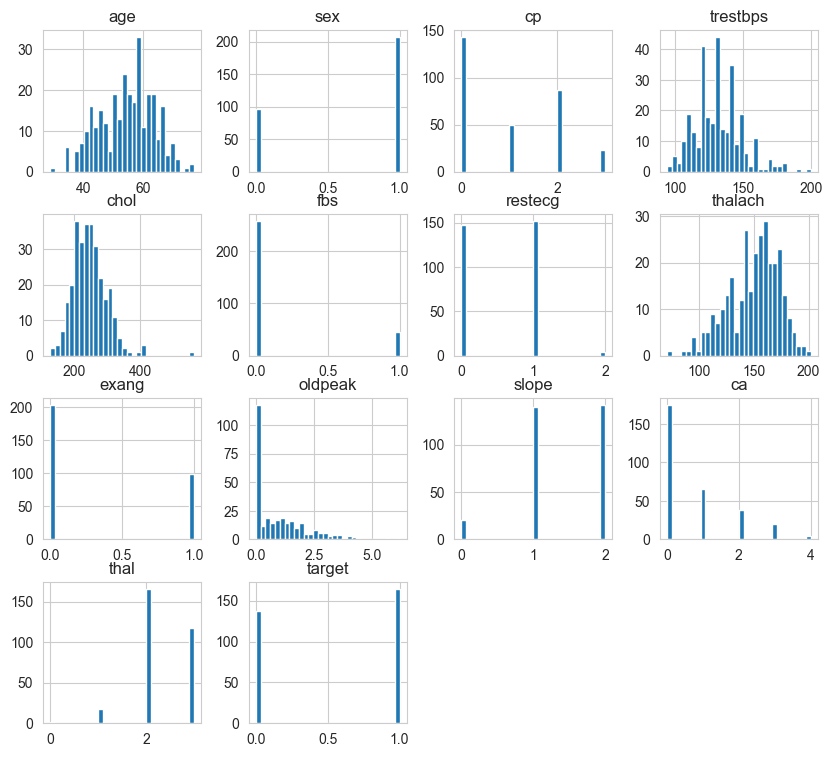

In [35]:
df.hist(bins=30, figsize=(10,9))
plt.show()

# Split Data

We're going to split the data into training and test datasets using stratified sampling based on a combination of sex feature and target since there is high imbalance of samples based on sex, and target based on sex.

In [50]:
X = df.drop(columns="target")
y = df["target"]

sex_and_target = X["sex"].astype(str) + "_" + y.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=sex_and_target)

In [51]:
X_test["sex"].value_counts()/len(X_test)

sex
1    0.688525
0    0.311475
Name: count, dtype: float64

In [52]:
X_train["sex"].value_counts()/len(X_train)

sex
1    0.681818
0    0.318182
Name: count, dtype: float64

In [53]:
y_train.value_counts()/len(y_train)

target
1    0.545455
0    0.454545
Name: count, dtype: float64

In [54]:
y_test.value_counts()/len(y_test)

target
1    0.540984
0    0.459016
Name: count, dtype: float64

# 3. EDA

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

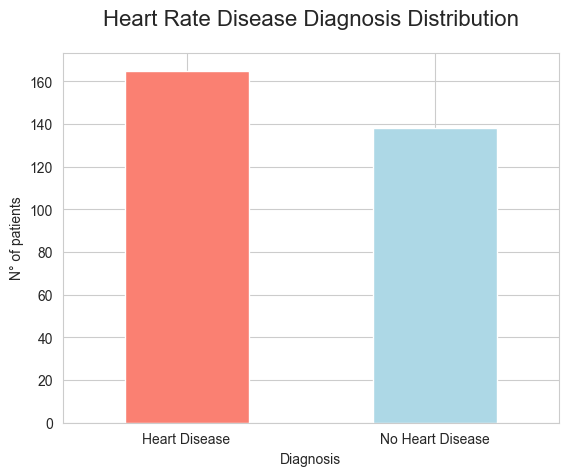

In [7]:
target_labels = pd.Series(np.where(df["target"] == 1, "Heart Disease", "No Heart Disease"))
ax = target_labels.value_counts().plot(kind="bar", 
                                  color=["salmon", "lightblue"], 
                                  rot=0)
ax.set_title(label="Heart Rate Disease Diagnosis Distribution",
             fontsize=16,
             pad=20)
ax.set_xlabel(xlabel="Diagnosis")
ax.set_ylabel(ylabel="N° of patients")
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency by Sex

<Axes: >

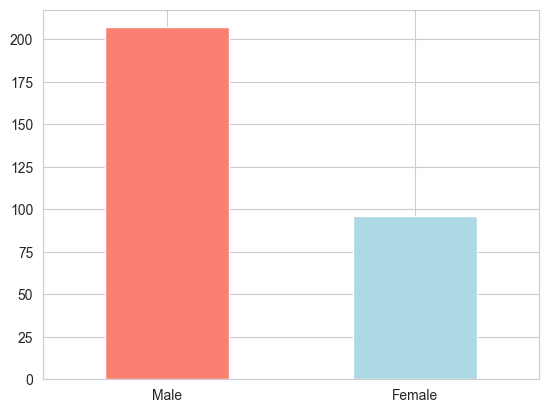

In [359]:
sex_distribution = pd.Series(np.where(df["sex"] == 1, "Male", "Female"))
sex_distribution.value_counts().plot(kind="bar",
                      color=["salmon", "lightblue"],
                      rot=0)

In [360]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


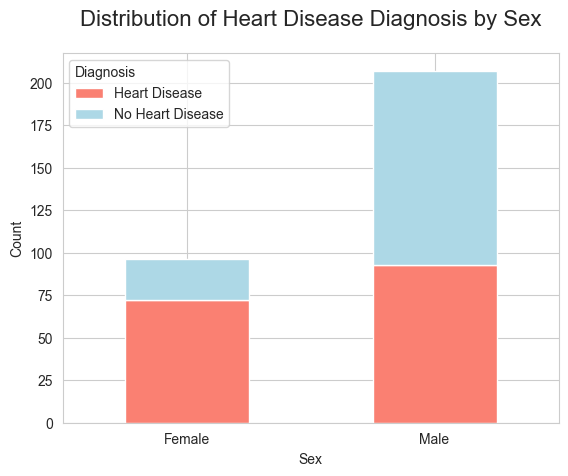

In [496]:
sex_label = pd.Categorical(np.where(df["sex"] == 1, "Male", "Female"))
diagnosis_label = pd.Categorical(np.where(df["target"] == 1, "Heart Disease", "No Heart Disease"))
sex_diagnosis_df = pd.DataFrame(data={"sex": sex_label,"diagnosis":diagnosis_label})
sex_diagnosis_df.head()
sex_diagnosis_distribution = pd.crosstab(index=sex_label, 
                                         columns=diagnosis_label)
sex_diagnosis_distribution.plot(kind="bar", 
                                stacked=True,
                                color=["salmon","lightblue"]
                                )


plt.title(label="Distribution of Heart Disease Diagnosis by Sex",
          fontsize=16,
          pad=20)
plt.ylabel(ylabel="Count")
plt.xlabel(xlabel="Sex")
plt.legend(title="Diagnosis",
           alignment="left",
           title_fontsize="10")
plt.xticks(rotation=0);

## N° of major vessels colored by fluoroscopy by Diagnosis

In [362]:
df["ca"].value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [363]:
ca_colors = ["salmon", "lightblue", "orchid", "purple", "magenta"]

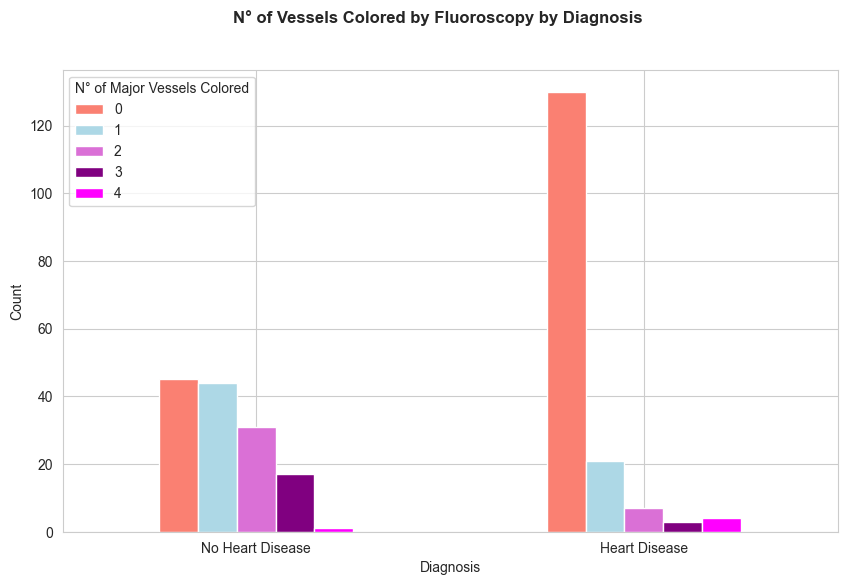

In [364]:
# Create graph showing the distribution of number of major vessels colored by fluoroscopy for each heart disease diagnosis
cross_data = pd.crosstab(index=df["target"],
                         columns=df["ca"])

cross_data.plot(kind="bar",
                figsize=(10,6),
                color=ca_colors)

# Add and style labels
plt.suptitle(t="N° of Vessels Colored by Fluoroscopy by Diagnosis",
             fontsize="large", 
             fontweight="semibold")

plt.xticks(ticks=[0,1], 
           labels=["No Heart Disease", "Heart Disease"], 
           rotation=0)
plt.xlabel(xlabel="Diagnosis")
plt.ylabel(ylabel="Count")
plt.legend(title="N° of Major Vessels Colored",
           loc="upper left",
           alignment="left")

plt.show()

## Resting Blood Pressure and Cholesterol Levels By Sex

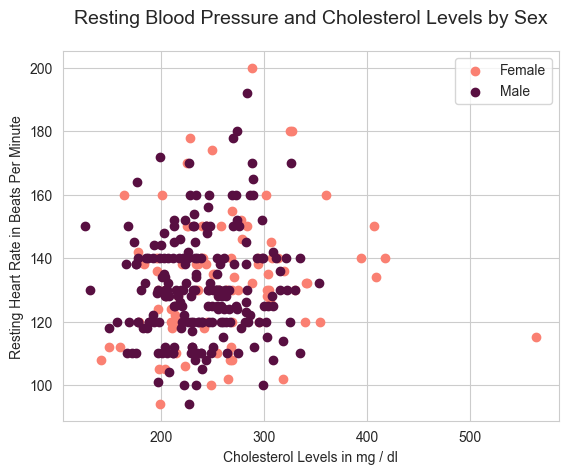

In [365]:
# Create scatterplot to view relationship between resting blood pressure (trestbps) and cholesterol levels in mg/dl (chol) by sex
fig, ax = plt.subplots()

# Add data for female samples to the chart
w_blood_pressure = df[df["sex"]==0]["trestbps"]
chol = df[df["sex"]==0]["chol"]
ax.scatter(x=chol,
           y=w_blood_pressure,
           c="salmon")

# Add data for male samples to the chart
m_blood_pressure = df[df["sex"]==1]["trestbps"]
chol = df[df["sex"]==1]["chol"]
ax.scatter(x=chol,
           y=m_blood_pressure,
           c="xkcd:plum")

# Add and style labels
ax.set_title(label="Resting Blood Pressure and Cholesterol Levels by Sex",
             fontdict={"fontsize":14},
             pad=20)
ax.set_xlabel(xlabel="Cholesterol Levels in mg / dl")
ax.set_ylabel(ylabel="Resting Heart Rate in Beats Per Minute")
ax.legend(labels=["Female", "Male"])

plt.show()

## Chest Pain Type by Age

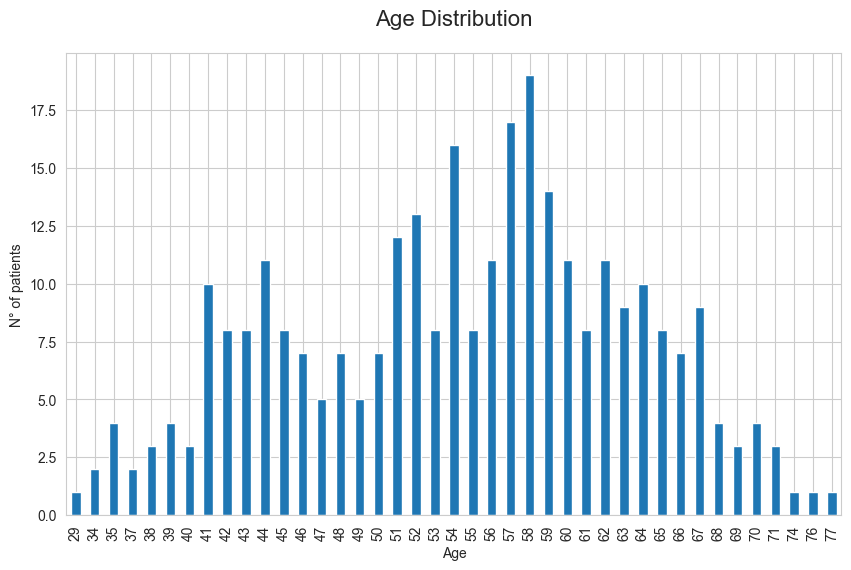

In [366]:
# Check age distribution
ax = df["age"].value_counts().sort_index().plot(kind="bar", figsize=(10,6))\

# Add and style labels
ax.set_title(label="Age Distribution",
             fontsize=16,
             pad=20)
ax.set_xlabel(xlabel="Age")
ax.set_ylabel(ylabel="N° of patients")

plt.show()

In [367]:
# Create age groups
bins = [20,40, 50, 60, 70, 80]
labels = ["20-39", "40-49","50-59", "60-69", "70+"]
df_with_age_groups = df.copy()
df_with_age_groups["age_groups"] = pd.cut(df_with_age_groups["age"], bins, labels)
df_with_age_groups["age_groups"]

0      (60, 70]
1      (20, 40]
2      (40, 50]
3      (50, 60]
4      (50, 60]
         ...   
298    (50, 60]
299    (40, 50]
300    (60, 70]
301    (50, 60]
302    (50, 60]
Name: age_groups, Length: 303, dtype: category
Categories (5, interval[int64, right]): [(20, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]

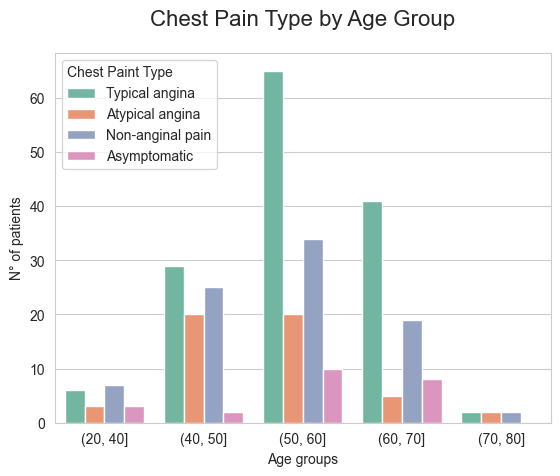

In [368]:
# Plot chest pain type distribution  by age group
plt.figure()
ax = sns.countplot(data=df_with_age_groups, hue="cp", x="age_groups", palette="Set2")

# Add legend
ax.legend(title="Chest Paint Type",
          alignment="left",
          loc="upper left",
          labels=["Typical angina","Atypical angina", "Non-anginal pain", "Asymptomatic"])

# Add and style labels
ax.set_title(label="Chest Pain Type by Age Group", fontsize=16, pad=20)
ax.set_ylabel(ylabel="N° of patients")
ax.set_xlabel(xlabel="Age groups")

plt.show()

## Thalium Stress Result and Heart Disease Diagnosis

In [369]:
# Get distribution of thalium stress results
thal_distribution = df["thal"].value_counts().sort_index()

In [370]:
thal_distribution

thal
0      2
1     18
2    166
3    117
Name: count, dtype: int64

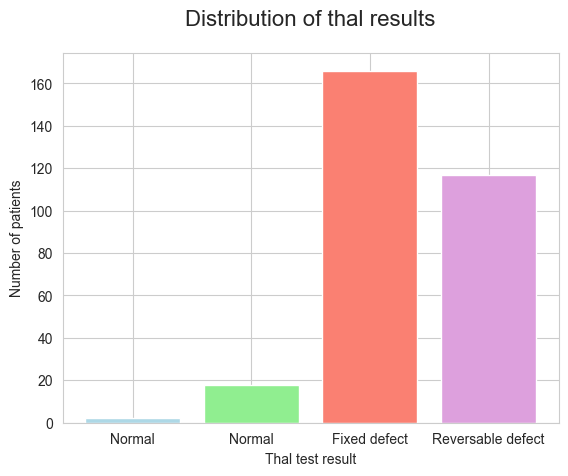

In [371]:
# Create barchart to plot distribution of thalium stress results
fig, ax = plt.subplots()
ax.bar(thal_distribution.index, thal_distribution.values, color=["lightblue","lightgreen","salmon", "plum"])

# Add labels
ax.set_title(label="Distribution of thal results", 
             fontsize=16, 
             pad=20)
ax.set_xlabel(xlabel="Thal test result")
ax.set_ylabel(ylabel="Number of patients")

# # Customize x-axis tick labels
xticks = list(np.sort(df["thal"].unique()))
plt.xticks(ticks=xticks, labels=["Normal", "Normal", "Fixed defect", "Reversable defect"])

plt.show()

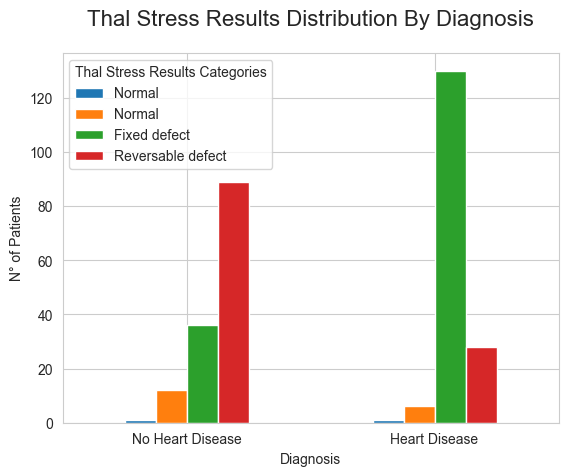

In [372]:
# Plot barchart with distribution of Thalium Stress Results by Heart Disease Diagnosis Type
ax = pd.crosstab(index=df["target"], 
                 columns=df["thal"]).plot(kind="bar")

# Set labels
ax.set_title(label="Thal Stress Results Distribution By Diagnosis",
             fontsize=16,
             pad=20)
ax.set_xlabel(xlabel="Diagnosis")
ax.set_ylabel(ylabel="N° of Patients")

# Customize x-axis tick labels
xticks = np.sort(df["target"].unique())
ax.set_xticks(ticks= xticks,
              labels=["No Heart Disease", "Heart Disease"], 
              rotation=0)

ax.legend(title="Thal Stress Results Categories",
          labels=["Normal", "Normal", "Fixed defect", "Reversable defect"],
          alignment="left")


plt.show()

## ECG Results Distribution By Heart Diagnosis

In [373]:
# Order by index to ensure x-axis tick labels will be in the correct order
df["restecg"].value_counts().sort_index()

restecg
0    147
1    152
2      4
Name: count, dtype: int64

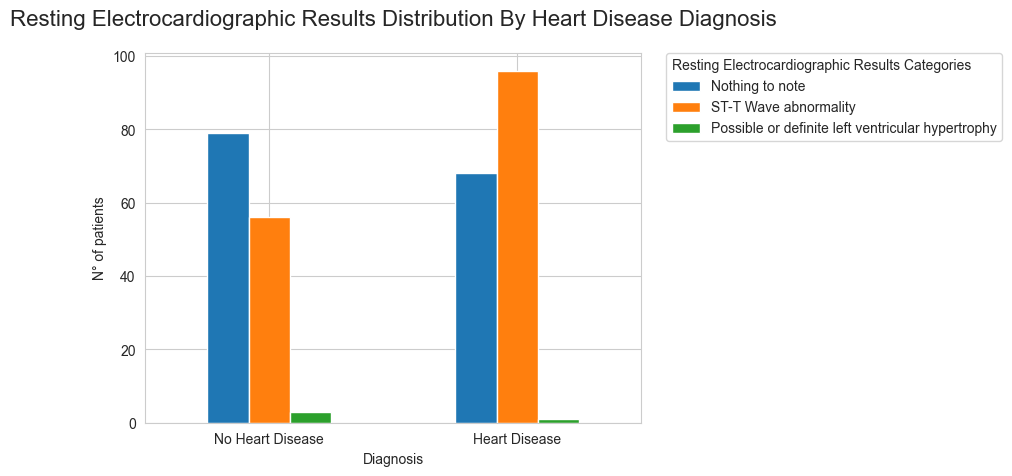

In [374]:
# Plot barchart with Resting Electrocardiographic Results Distribution By Heart Disease Diagnosis
ax = pd.crosstab(index=df["target"],
            columns=df["restecg"]).plot(kind="bar")

# Add labels
ax.set_title(label="Resting Electrocardiographic Results Distribution By Heart Disease Diagnosis",
             fontsize=16,
             pad=20)
ax.set_xlabel(xlabel="Diagnosis")
ax.set_ylabel(ylabel="N° of patients")

# Add and customize legend
ax.legend(title="Resting Electrocardiographic Results Categories",
          alignment="left",
          labels=["Nothing to note", "ST-T Wave abnormality", "Possible or definite left ventricular hypertrophy"],
          bbox_to_anchor=(1.05, 1),
          borderaxespad=0
          )

# Customize x-axis ticks
xticks= np.sort(df["target"].unique())
ax.set_xticks(ticks=xticks,
              labels=["No Heart Disease", "Heart Disease"],
              rotation=0)

plt.show()

In [375]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Age vs Max Heart Rate

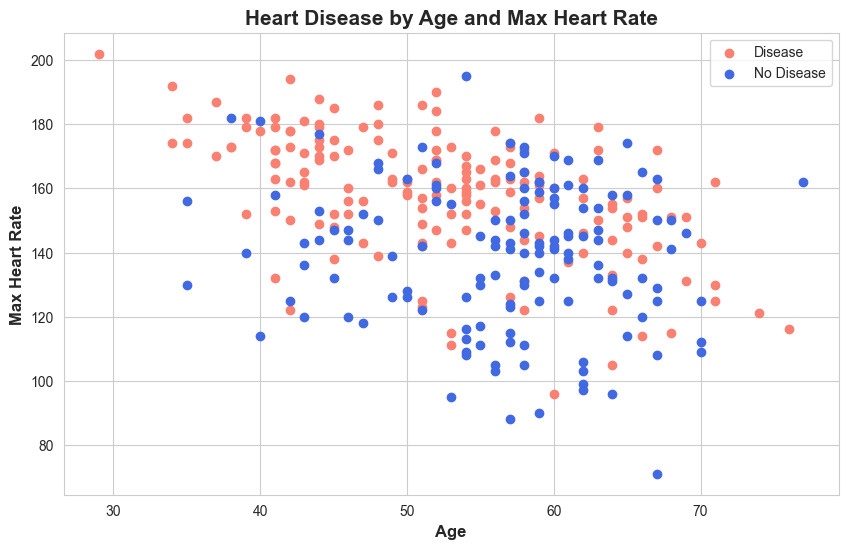

In [376]:
# Create scatter plot for plotting Age by Max Heart Rate
plt.figure(figsize=(10, 6))

# Scatter plot positive diagnosis samples data
plt.scatter(x=df[df["target"]==1]["age"], 
            y=df[df["target"]==1]["thalach"],
            c="salmon")

# Scatter plot negative diagnosis samples data
plt.scatter(x=df[df["target"]==0]["age"],
            y=df[df["target"]==0]["thalach"],
            c="royalblue")

# Add labels
plt.title(label="Heart Disease by Age and Max Heart Rate",
          fontdict={"fontweight":"bold",
                    "fontsize":15})
plt.xlabel(xlabel="Age",
           fontdict={"fontweight":700,
                     "fontsize":12})
plt.ylabel(ylabel="Max Heart Rate",
           fontdict={"fontweight":700,
                     "fontsize":12})

# Add legend
plt.legend(["Disease", "No Disease"])

plt.show()

The younger someone is, the higher the max heart rate.
People diagnosed with heart disease tend to have higher Max Heart Rate

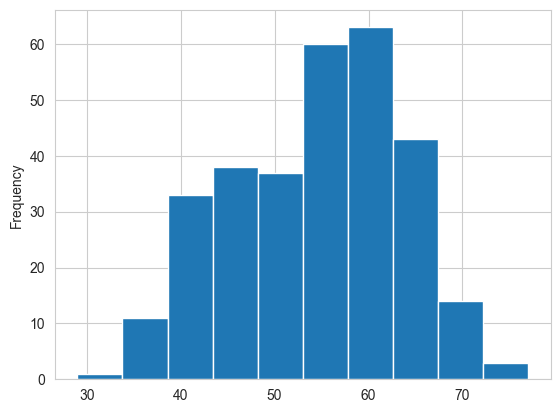

In [377]:
# Check the distribution of age
df.age.plot.hist();

## Max Heart Rate and Heart Disease Diagnosis

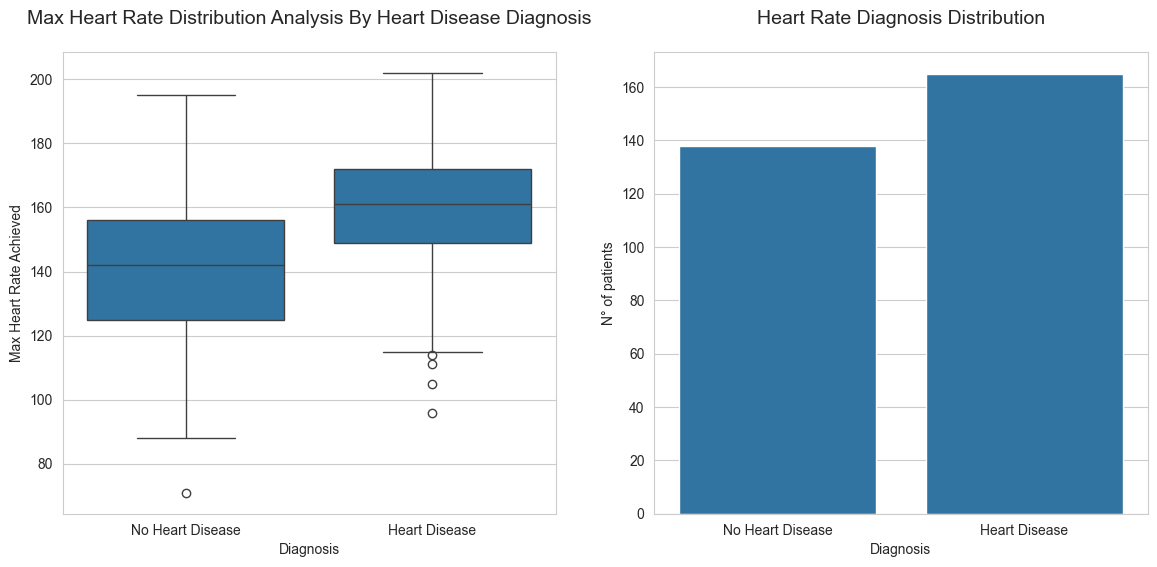

In [499]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

# Create boxplot with Maximum Heart Rate Achieved by Heart Disease Diagnosis
sns.boxplot(data=df, x="target", y="thalach", ax=ax[0])

# Add labels to boxplot chart 
ax[0].set_xlabel(xlabel="Diagnosis")
ax[0].set_ylabel(ylabel="Max Heart Rate Achieved")
ax[0].set_title(label="Max Heart Rate Distribution Analysis By Heart Disease Diagnosis",
                fontsize=14,
                pad=20)
# Customize boxplot x-axis ticks
ax[0].set_xticks(ticks=[0, 1], 
                 labels=["No Heart Disease", "Heart Disease"], 
                 rotation=0)

# Plot barchart with Heart Rate Distribution to check for imbalances
sns.countplot(data=df, x="target", ax=ax[1])

# Add labels
ax[1].set_title(label="Heart Rate Diagnosis Distribution",
                fontsize=14,
                pad=20)
ax[1].set_xlabel(xlabel="Diagnosis")
ax[1].set_ylabel(ylabel="N° of patients")

# Customize x-axis ticks
ax[1].set_xticks(ticks=[0, 1],
                 labels=["No Heart Disease", "Heart Disease"],
                 rotation=0)

plt.show()

## Chest Paint Type Distribution

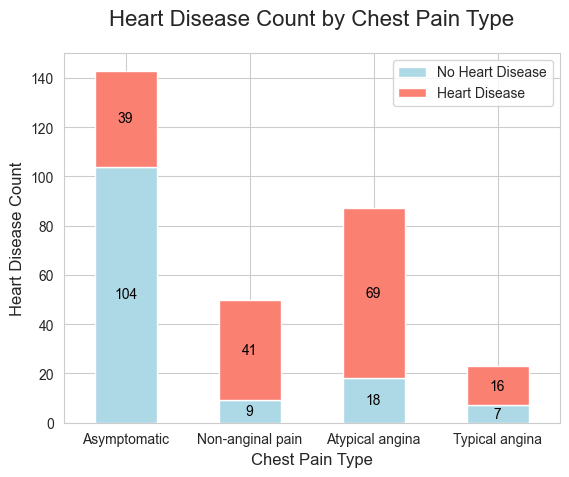

In [379]:
# Plot Chest Pain Type Distribution
ax = pd.crosstab(df["cp"], df["target"]).plot(kind="bar", 
                                         stacked=True,
                                         color=["lightblue", "salmon"])

# Add labels
plt.title(label="Heart Disease Count by Chest Pain Type",
          fontsize=16,
          pad=20)
plt.ylabel(ylabel="Heart Disease Count",
          fontdict={
              "fontweight":500,
              "fontsize":12
          })
plt.xlabel(xlabel="Chest Pain Type",
           fontdict={
               "fontweight":500,
               "fontsize":12
           })

plt.legend(["No Heart Disease", "Heart Disease"])


plt.xticks(rotation=0, 
           ticks=df["cp"].unique(),
           labels=["Typical angina", 
                   "Atypical angina", 
                   "Non-anginal pain",
                   "Asymptomatic"])

for i, rect in enumerate(ax.patches):
    # Get patch coordinates
    height = rect.get_height()
    x_coord = rect.get_x() + rect.get_width() / 2  # Position x to middle of the patch
    y_coord = rect.get_y() + height / 2            # Position y to middle of the patch

    # Add label with nbr of occurrences to each bar segment representing a distinct heart disease diagnosis for a given chest pain type
    ax.text(x_coord, y_coord, int(height), ha='center', va='center', fontsize=10, color="black")

plt.show()

## Resting Blood Pressure and Exercice Induced Heart Stress

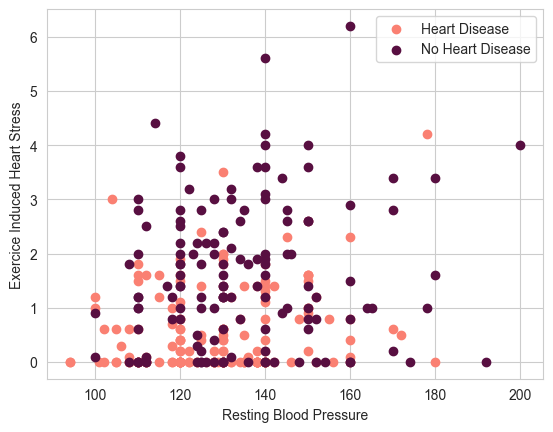

In [380]:
fig, ax = plt.subplots()

# Plot resting blood pressure and exercise induced heart stress for positive diagnosis samples
ax.scatter(x=df[df["target"]==1]["trestbps"],
           y=df[df["target"]==1]["oldpeak"],
           c="salmon")

# Plot resting blood pressure and exercise induced heart stress for negative diagnosis samples
ax.scatter(x=df[df["target"]==0]["trestbps"],
           y=df[df["target"]==0]["oldpeak"],
           c="xkcd:plum")

# Add legend
ax.legend(["Heart Disease", "No Heart Disease"])

# Add labels
ax.set_title(label="")
ax.set_xlabel(xlabel="Resting Blood Pressure")
ax.set_ylabel(ylabel="Exercice Induced Heart Stress")
plt.show()

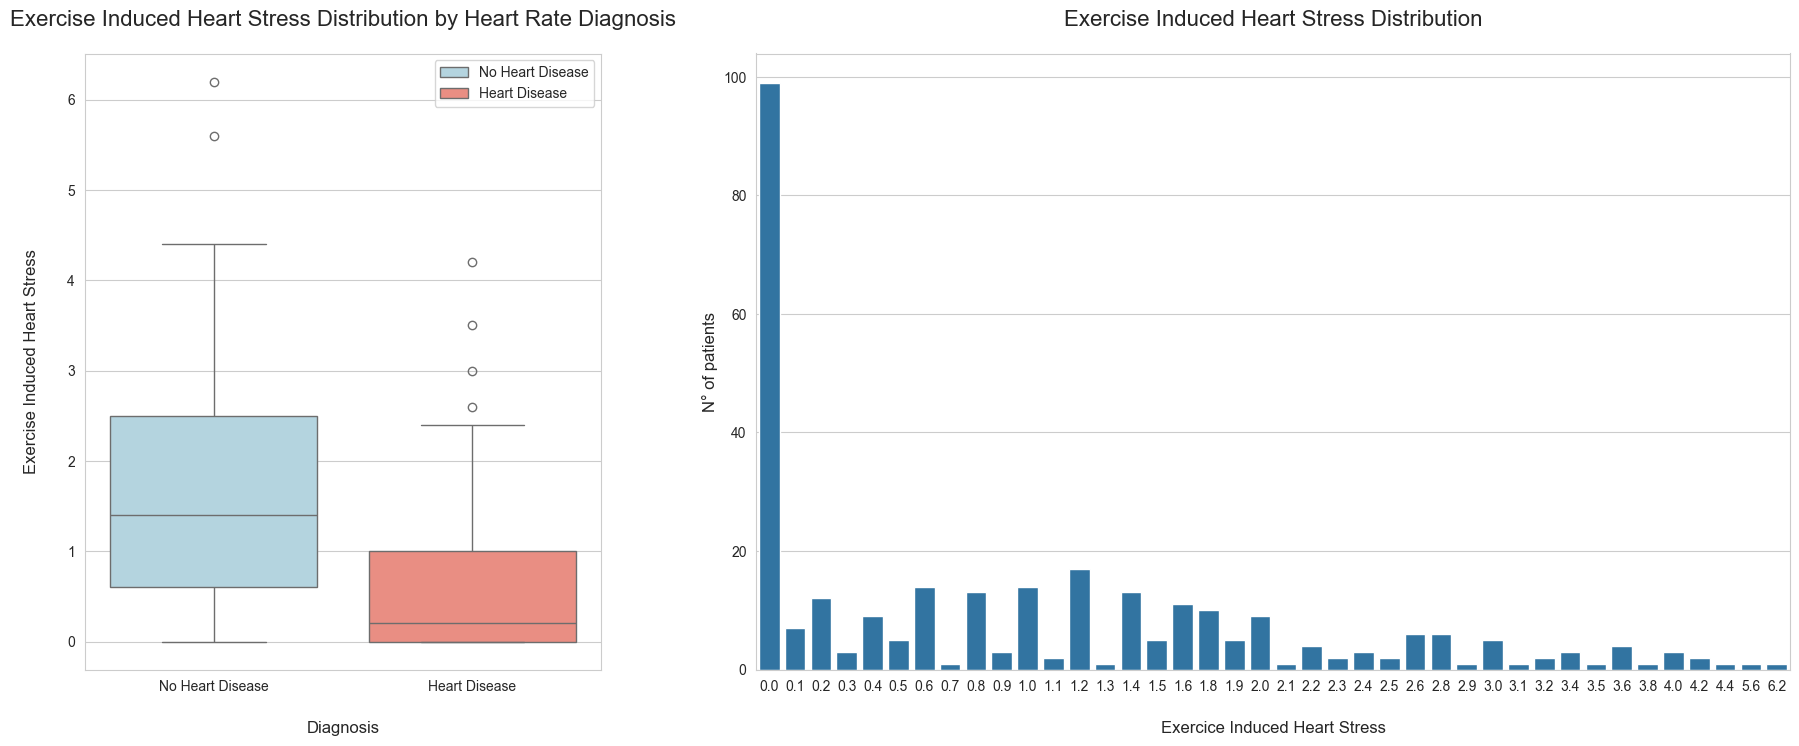

In [381]:
fig, ax = plt.subplots(1,2, figsize=(22,8), gridspec_kw={"width_ratios":[1,2]})

custom_palette = {0: "lightblue", 1: "salmon"}
sns.boxplot(data=df, x="target", y="oldpeak", hue="target", palette=custom_palette, ax=ax[0])
ax[0].set_title(label="Exercise Induced Heart Stress Distribution by Heart Rate Diagnosis",
                fontsize=16,
                pad=20)
ax[0].set_ylabel(ylabel="Exercise Induced Heart Stress",
                 fontsize=12,
                 labelpad=20)
ax[0].set_xlabel(xlabel="Diagnosis",
                 fontsize=12,
                 labelpad=20)
ax[0].legend(["No Heart Disease", "Heart Disease"])
ax[0].set_xticks(ticks=np.sort(np.unique(df["target"])), labels=["No Heart Disease", "Heart Disease"])

sns.countplot(data=df, x="oldpeak", ax=ax[1])
ax[1].set_title(label="Exercise Induced Heart Stress Distribution",
                fontsize=16,
                pad=20)
ax[1].set_xlabel(xlabel="Exercice Induced Heart Stress",
                 fontsize=12,
                 labelpad=20)
ax[1].set_ylabel(ylabel="N° of patients",
                 fontsize=12)


plt.show()

## Correlation matrix

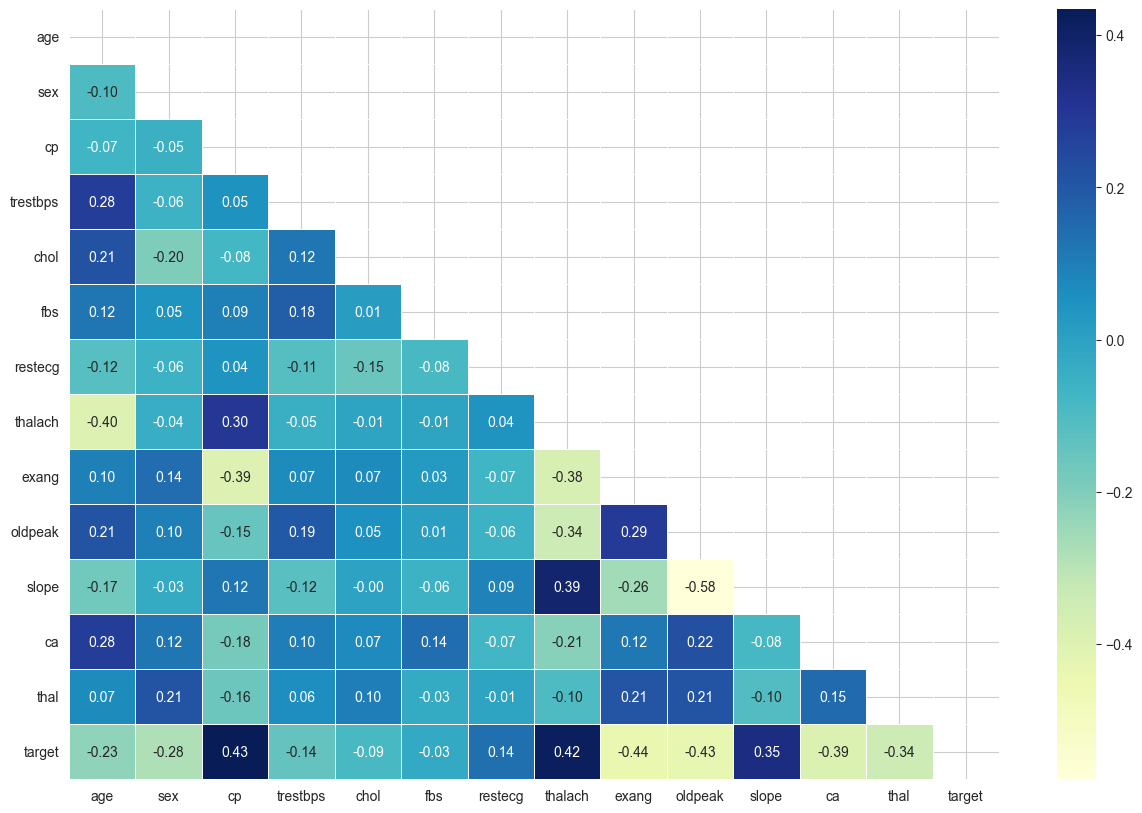

In [382]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    linewidths=0.5,
    fmt=".2f",
    cmap="YlGnBu",
    mask=mask
)
plt.yticks(rotation=0)
plt.show()

## 4. Modelling

In [383]:
# Split data into training and test datasets
X = df.drop(columns="target")
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [384]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Gradient Boosting": GradientBoostingClassifier(),
          "XGBoost": XGBClassifier()
          }

# Function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """         
    Fits and evaluates models specified in the models dictionary
    :param models: 
    a dictionary containing different Scikit-learn machine learning models
    :param X_train: training data (no labels)
    :param X_test: testing data (no labels)
    :param y_train: training labels
    :param y_test: test labels
    :return model_scores : a dictionary containing model scores for each model in models param
    """
    # Set random seed
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append score to model scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
        

In [385]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)

In [386]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'Gradient Boosting': 0.7704918032786885,
 'XGBoost': 0.819672131147541}

## 5. Model Comparison

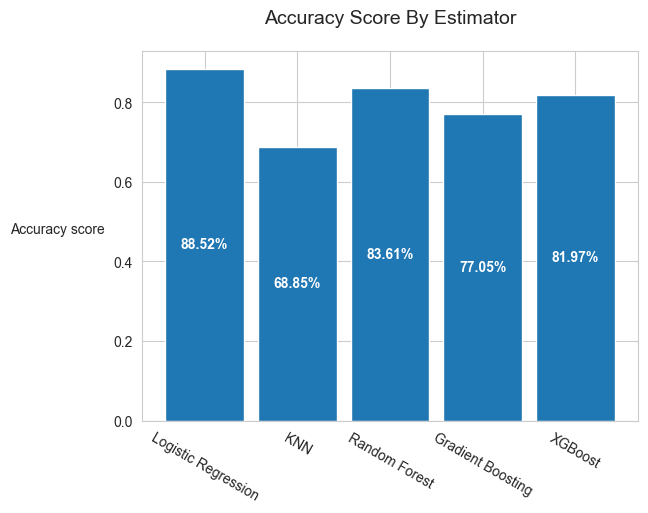

In [387]:
model_compare = pd.DataFrame(data=model_scores, 
                             index=["accuracy"])
ax=model_compare.T.plot.bar(width=0.85)

ax.set_title(label="Accuracy Score By Estimator",
             fontsize=14,
             pad=20)
plt.ylabel(ylabel="Accuracy score", 
           rotation=0,
           labelpad=40
           )
plt.xticks(rotation=-30)

for i, rect in enumerate(ax.patches):
    # Get patch coordinates
    height = rect.get_height()
    height_label = f"{height*100:.2f}%"
    x_coord = rect.get_x() + rect.get_width() / 2  # Position x to middle of the patch
    y_coord = rect.get_y() + height / 2            # Position y to middle of the patch

    # Add label with nbr of occurrences to each bar segment representing a distinct heart disease diagnosis for a given chest pain type
    ax.text(x_coord, y_coord, height_label, ha='center', va='center', fontsize=10, color="white", fontweight=600)
    
ax.get_legend().remove()

plt.show()

## 5. Hyperparameter tuning

In [388]:
# KNN hyperparameter tuning

train_scores = []
test_scores = []

# Create list for different values of n-neighbors
neighbors = range(1,21)
knn = KNeighborsClassifier()

for n in neighbors:
    knn.set_params(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_score=knn.score(X_train, y_train)
    train_scores.append(train_score)

    # Update the test scores list
    test_score=knn.score(X_test,y_test)
    test_scores.append(test_score)

Maximum KNN score on the test data: 75.41%


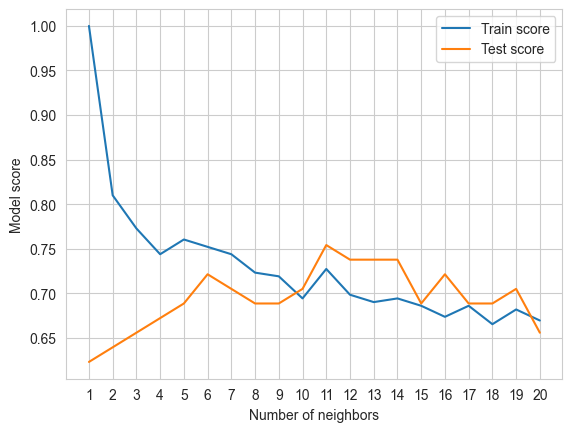

In [389]:
plt.plot(neighbors,train_scores, label="Train score")
plt.plot(neighbors,test_scores, label="Test score")
plt.xticks(ticks=np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel(ylabel="Model score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

In [390]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {
                "C": np.logspace(-8, 8, 40),
                "solver": ["liblinear", "lbfgs"],
                "penalty": ["l2"]
                }

# Create a hyperparameter grid for RandomForestClassifier
rf_clf_grid = {"n_estimators": np.arange(10, 1000, 50),
               "max_depth": [None, 3, 5, 10],
               "min_samples_split": np.arange(2, 20, 2),
               "min_samples_leaf": np.arange(1,20, 2)}

clf_xgboost_grid = {"n_estimators": np.arange(100, 300, 50),
                    "learning_rate" : [0.10,0.15,0.20,0.25,0.30],
                    "max_depth" : [ 5, 6, 8, 10, 12, 15], 
                    "min_child_weight" : [ 1, 3, 5, 7 ],
                    "gamma": [ 0.1, 0.2 , 0.3, 0.4, 0.5 ],
                    "colsample_bytree" : [ 0.1, 0.2, 0.3, 0.4 ]
}

In [391]:
# Tune Logistic Regression model

# Set up random hyperparameter search for LogisticRegression
n_iter_search=80
rs_log_reg = RandomizedSearchCV(LogisticRegression(max_iter=10_000, random_state=42),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=n_iter_search,
                                verbose=True
                                )

# Fit random hyperparameter search model for LogisticRegression
start_time=time.time()
rs_log_reg.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start_time), n_iter_search))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
RandomizedSearchCV took 10.92 seconds for 80 candidates parameter settings.


In [392]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': np.float64(0.24244620170823258)}

In [393]:
rs_log_reg_best_est = rs_log_reg.best_estimator_

In [394]:
rs_log_reg_best_est.score(X_test, y_test)

0.8852459016393442

In [395]:
# Set up random hyperparameter search for RandomForestClassifier
n_iter_search=50
rs_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                           param_distributions=rf_clf_grid,
                           cv=5,
                           n_iter=n_iter_search,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
start_time = time.time()
rs_rf.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start_time), n_iter_search))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV took 108.19 seconds for 50 candidates parameter settings.


In [396]:
rs_rf.best_params_

{'n_estimators': np.int64(760),
 'min_samples_split': np.int64(16),
 'min_samples_leaf': np.int64(9),
 'max_depth': 3}

In [397]:
rs_rf_best_estimator = rs_rf.best_estimator_

In [398]:
# Evaluate the best randomized search RandomForestClassifier model
rs_rf_best_estimator.score(X_test, y_test)

0.8688524590163934

In [399]:
# Set up random hyperparameter search for XGBoost
np.random.seed(42)

n_iter_search=100
clf_xgboost = RandomizedSearchCV(XGBClassifier(),
                                 param_distributions=clf_xgboost_grid,
                                 n_iter=n_iter_search,
                                 cv=5,
                                 verbose=True)

start = time.time()
clf_xgboost.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomizedSearchCV took 23.59 seconds for 100 candidates parameter settings.


In [400]:
clf_xgboost.best_params_

{'n_estimators': np.int64(150),
 'min_child_weight': 7,
 'max_depth': 15,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.2}

In [401]:
best_xgboost_estimator = clf_xgboost.best_estimator_

In [402]:
best_xgboost_estimator.score(X_test, y_test)

0.8852459016393442

## Hyperparameter tuning with GridSearchCV

Since the Logistic Regression and XGBoost models provided the best scores, these are the models we are going to try and improve further using GridSearchCV

### Logistic Regression

In [434]:
# Create a new hyperparameters grid for the LogisticRegressionModel
log_reg_grid = {
                "C": np.logspace(-4, 4, 80),
                "solver": ["liblinear"],
                "penalty": ["l1", "l2"],
                "max_iter": [1_000, 10_000]
                }

# Set up grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression( 
                                             random_state=42),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit the grid hyperparameter search model
start_time = time.time()
gs_log_reg.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start_time), n_iter_search))

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
RandomizedSearchCV took 7.15 seconds for 100 candidates parameter settings.


C:\Data Science\Projects\heart_disease_project\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [435]:
gs_log_reg.best_params_

{'C': np.float64(0.2196707090793235),
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [436]:
# Evaluate the grid hyperparameter search LogisticRegression model
gs_log_reg_best_est = gs_log_reg.best_estimator_
gs_log_reg_best_est.score(X_test, y_test)

0.8852459016393442

In [437]:
y_preds = gs_log_reg_best_est.predict(X_test)

In [438]:
print(classification_report(y_true=y_test, y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### XGBoost Classifier

In [406]:
# Create new hyperparameter grid 
xgboost_clf_grid= {"n_estimators": np.arange(50, 400, 50),
                   "learning_rate" : [0.20,0.25, 0.35],
                   "max_depth" : [ 8, 10, 12],
                   "min_child_weight" : [  5, 7 ],
                   "gamma": [ 0.1, 0.2, 0.4],
                   "colsample_bytree" : [ 0.2, 0.3]}

np.random.seed(42)

clf_xgboost = GridSearchCV(estimator=XGBClassifier(),
                           param_grid=xgboost_clf_grid,
                           cv=5,
                           verbose=True)

start = time.time()
clf_xgboost.fit(X_train, y_train)
print("GridSearch took %.2f seconds"
      " parameter settings." % ((time.time() - start)))

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
GridSearch took 422.54 seconds parameter settings.


C:\Data Science\Projects\heart_disease_project\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [407]:
clf_xgboost.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.2,
 'learning_rate': 0.25,
 'max_depth': 8,
 'min_child_weight': 5,
 'n_estimators': np.int64(50)}

In [408]:
best_clf_xgboost_est = clf_xgboost.best_estimator_

In [409]:
best_clf_xgboost_est.score(X_test, y_test)

0.8688524590163934

In [410]:
y_preds = best_clf_xgboost_est.predict(X_test)

In [411]:
print(classification_report(y_true=y_test, y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Despite a more exhaustive grid search for XGBoost, it still performs worse than Logistic Regression. We're going to explore further the Logistic Regression Estimator.

## 6. Model Evaluation
* ROC cuve and AUC score
* Confusion matrix
* Classification repoort
* Precision
* Recall
* F1-score

In [471]:
y_preds = gs_log_reg_best_est.predict(X_test)

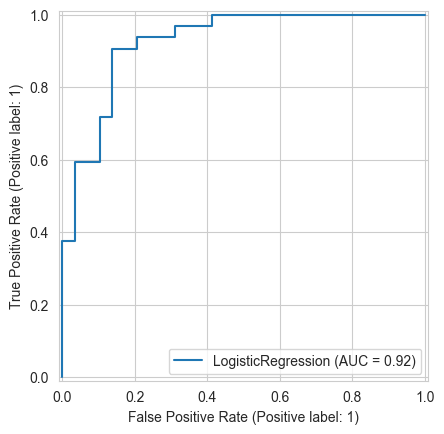

In [472]:
# Plot ROC curve and calculate AUC metric
display = RocCurveDisplay.from_estimator(estimator=gs_log_reg_best_est,
                                         X=X_test, 
                                         y=y_test)
plt.show()

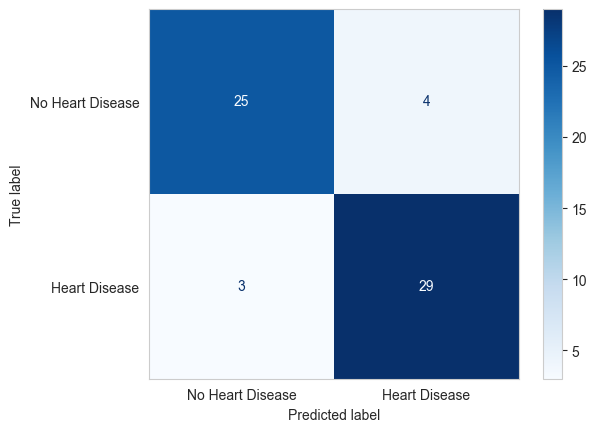

In [473]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay 
display = ConfusionMatrixDisplay.from_estimator(estimator=gs_log_reg,
                                                X=X_test,
                                                y=y_test,
                                                cmap=plt.cm.Blues,
                                                #colorbar=False
                                                )

plt.xticks(ticks=[0, 1], labels=["No Heart Disease", "Heart Disease"])
plt.yticks(ticks=[0, 1], labels=["No Heart Disease", "Heart Disease"])
plt.grid(False)
plt.show()

In [474]:
# Classification report with cross-validation metrics

# Check best hyperparameters
gs_log_reg.best_params_ 


{'C': np.float64(0.2196707090793235),
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [475]:
# Create a new classifier with the best parameters found
clf = gs_log_reg.best_estimator_

In [476]:
# Create function to calculate cross-validated metric score
def calc_cross_val_metric_score(scoring_metric, estimator, X, y, cv):
    score = cross_val_score(estimator=estimator,
                            X=X,
                            y=y,
                            cv=cv,
                            scoring=scoring_metric)
    return np.mean(score)

In [477]:
# Create function that takes in a list of metrics and calculates score for each of them
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
def calc_cross_val_scores(metrics, estimator, X, y, cv):
    """
    Function that returns a dictionary with cross-validated score for the metrics passed in the metrics list parameter 
    :param metrics: 
    :param estimator: 
    :param X: 
    :param y: 
    :param cv: 
    :return: 
    """
    
    cross_val_scores = {}
    
    for metric in metrics:
        score = calc_cross_val_metric_score(scoring_metric=metric,
                                            estimator=estimator,
                                            X=X,
                                            y=y,
                                            cv=cv)
        cross_val_scores[metric] = score 
        
    return cross_val_scores
        

In [478]:
cross_val_scores = calc_cross_val_scores(metrics=scoring_metrics,
                      estimator=clf,
                      X=X,
                      y=y,
                      cv=5)

In [479]:
cross_val_scores

{'accuracy': np.float64(0.8479781420765027),
 'precision': np.float64(0.8215873015873015),
 'recall': np.float64(0.9272727272727274),
 'f1': np.float64(0.8705403543192143)}

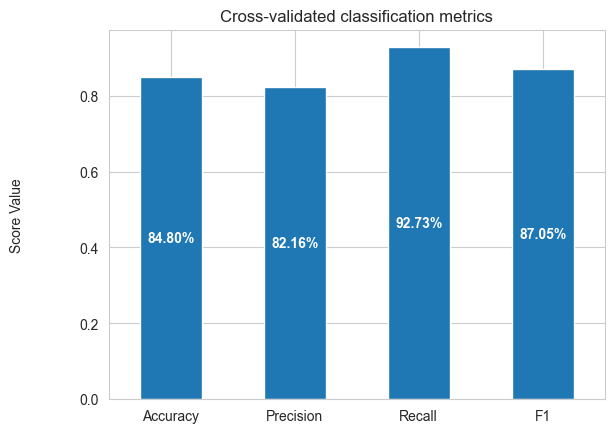

In [480]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cross_val_scores["accuracy"],
                           "Precision": cross_val_scores["precision"],
                           "Recall": cross_val_scores["recall"],
                           "F1": cross_val_scores["f1"]},
                          index=[0])

ax = cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False)


plt.ylabel(ylabel="Score Value",
           labelpad=40
           )
plt.xticks(rotation=0)

for i, rect in enumerate(ax.patches):
    # Get patch coordinates
    height = rect.get_height()
    height_label = f"{height*100:.2f}%"
    x_coord = rect.get_x() + rect.get_width() / 2  # Position x to middle of the patch
    y_coord = rect.get_y() + height / 2            # Position y to middle of the patch

    # Add label with nbr of occurrences to each bar segment representing a distinct heart disease diagnosis for a given chest pain type
    ax.text(x_coord, y_coord, height_label, ha='center', va='center', fontsize=10, color="white", fontweight=600)

plt.show()

## 7. Feature importance

Which features contributed most ot the outcomes of the model and how much did they contribute ot it?

In [481]:
# Fit an instance of LogisticRegression
clf = gs_log_reg.best_estimator_
clf.fit(X_train, y_train)

LogisticRegression(C=np.float64(0.2196707090793235), max_iter=1000,
                   random_state=42, solver='liblinear')

In [482]:
# Check feature coefficients
clf.coef_.T

array([[ 0.00346421],
       [-0.88552424],
       [ 0.66843865],
       [-0.01158623],
       [-0.00168799],
       [ 0.04659069],
       [ 0.32361534],
       [ 0.02467706],
       [-0.61941536],
       [-0.57243395],
       [ 0.46170596],
       [-0.64417136],
       [-0.68806513]])

In [483]:
# Match feature coefficients to columns
coeff_list = list(clf.coef_[0])
feature_dict = dict(zip(df.columns, coeff_list ))

In [484]:
feature_dict

{'age': np.float64(0.0034642059896477875),
 'sex': np.float64(-0.8855242416650025),
 'cp': np.float64(0.6684386496491665),
 'trestbps': np.float64(-0.011586230889601559),
 'chol': np.float64(-0.0016879946833337155),
 'fbs': np.float64(0.04659068871879925),
 'restecg': np.float64(0.32361533704393153),
 'thalach': np.float64(0.024677061836461175),
 'exang': np.float64(-0.6194153641733358),
 'oldpeak': np.float64(-0.5724339542745337),
 'slope': np.float64(0.461705962901377),
 'ca': np.float64(-0.6441713576854176),
 'thal': np.float64(-0.688065134201988)}

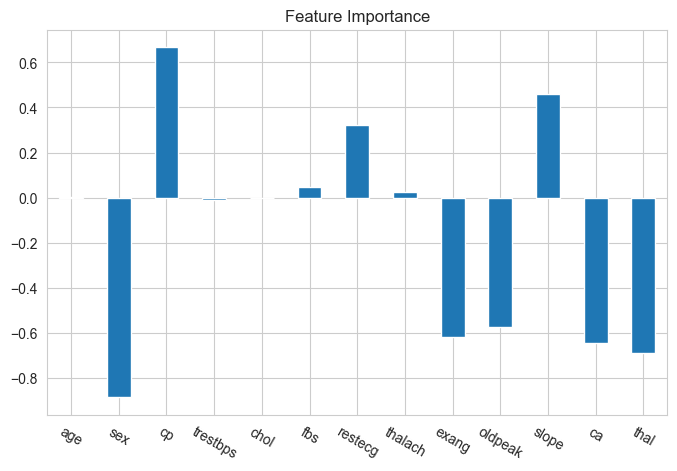

In [485]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
ax = feature_df.T.plot.bar(figsize=(8, 5),
                           title="Feature Importance", 
                           legend=False)

plt.xticks(rotation=-30)

plt.show()

In [430]:
joblib.dump(clf, "models/heart_disease_classifier_model_opt.joblib")

['models/heart_disease_classifier_model_opt_1.joblib']